# Phishing Website Detection using Machine Learning

## Project Objective
The objective of this project is to build a Machine Learning model that can classify websites as:
- Legitimate
- Phishing

Phishing websites are fake websites designed to steal sensitive information such as passwords, credit card numbers, and personal data.

This project uses:
- Supervised Machine Learning
- Random Forest Classifier
- Feature-based URL analysis


In [41]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib


## Step 1: Import Required Libraries

We import the following libraries:

- Pandas → For data handling
- NumPy → For numerical operations
- Matplotlib & Seaborn → For visualization
- Scikit-learn → For Machine Learning models
- Joblib → For saving the trained model


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


## Step 2: Load the Dataset

The dataset contains 10,000 rows and 18 columns.

- 17 input features
- 1 target column (Label)

The target column:
Label
0 → Legitimate Website
1 → Phishing Website

The 'Domain' column contains website names (string type)
and is not used for model training because Machine Learning
models require numerical input features.


In [43]:
url = "https://raw.githubusercontent.com/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques/master/DataFiles/5.urldata.csv"
data = pd.read_csv(url)

print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (10000, 18)


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


The dataset contains 10,000 rows and 18 columns.
17 input features
1 output column (Label)

The 'Domain' column contains website names (string type)
and is not used for model training.


In [44]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

,0
Domain,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0


## Step 3: Feature and Target Separation

We separate:
X → Independent variables (features)
y → Dependent variable (Result)

This is required before training the Machine Learning model.


In [45]:
X = data.drop(["Label", "Domain"], axis=1)
y = data["Label"]

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (10000, 16)
Target Shape: (10000,)


## Step 4: Train-Test Split

We split the dataset into:
- 80% Training data
- 20% Testing data

Training data is used to train the model.
Testing data is used to evaluate the model performance.


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 8000
Testing samples: 2000


## Step 5: Model Training

We use Random Forest Classifier because:

- It is an ensemble learning method.
- It combines multiple decision trees.
- It reduces overfitting.
- It provides high accuracy for classification problems.


In [47]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    random_state=42
)

model.fit(X_train, y_train)

print("Model Training Completed!")

Model Training Completed!


## Step 6: Model Evaluation

We evaluate the model using:

- Accuracy Score
- Precision
- Recall
- F1-Score
- Confusion Matrix

These metrics help us understand how well the model performs.


In [48]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.86

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1012
           1       0.95      0.76      0.84       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



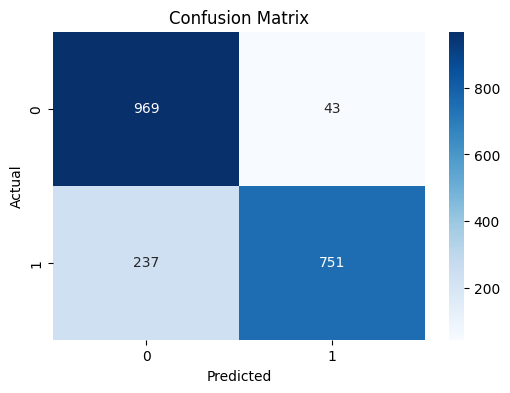

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Step 7: Feature Importance

Random Forest provides feature importance values.

This helps us understand:
Which features are most influential in detecting phishing websites.


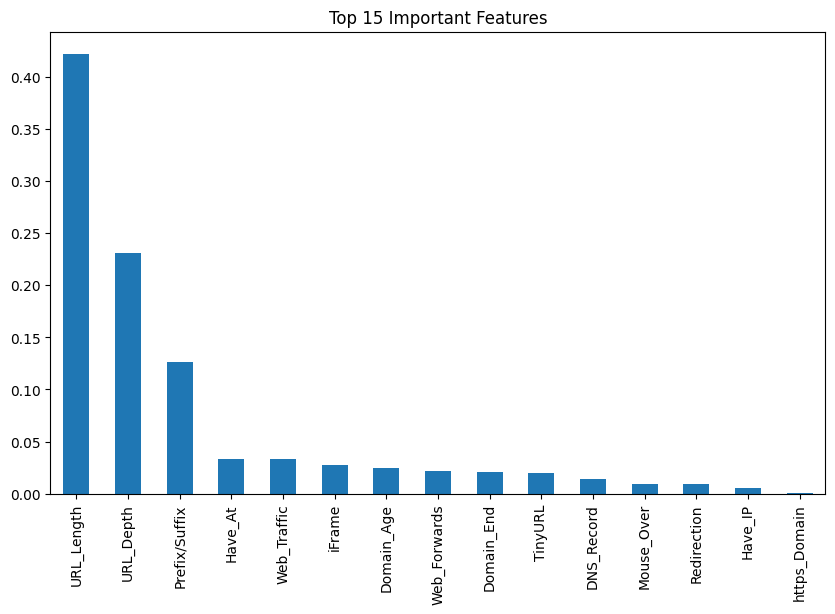

In [50]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importances.head(15).plot(kind='bar')
plt.title("Top 15 Important Features")
plt.show()

## Step 8: Save the Model

We save the trained model so that it can be used later for deployment in a web application.


In [51]:
joblib.dump(model, "phishing_model.pkl")
print("Model saved successfully!")


Model saved successfully!


## Conclusion

In this project, a Random Forest classifier was used to detect phishing websites.

The dataset contained 10,000 samples with 16 numerical features used for training.

The model achieved approximately 86% accuracy.

The model performs well in identifying legitimate websites,
but some phishing websites were misclassified.

Future Improvements:
- Hyperparameter tuning
- Cross-validation
- Trying Gradient Boosting or XGBoost
- Feature engineering
- Deployment using Streamlit or Flask

This project demonstrates how Machine Learning can be applied
in cybersecurity to prevent phishing attacks.


-----to check the code is working using real urls ------

In [ ]:
import re
from urllib.parse import urlparse

def extract_features(url):
    features = []

    # 1. Have_IP
    ip_pattern = r'(\d{1,3}\.){3}\d{1,3}'
    features.append(1 if re.search(ip_pattern, url) else 0)

    # 2. Have_At
    features.append(1 if "@" in url else 0)

    # 3. URL_Length
    features.append(1 if len(url) > 54 else 0)

    # 4. URL_Depth
    path = urlparse(url).path
    depth = path.count('/')
    features.append(depth)

    # 5. Redirection
    features.append(1 if "//" in url[7:] else 0)

    # 6. https_Domain
    features.append(1 if url.startswith("https") else 0)

    # 7. TinyURL
    shortening_services = ["bit.ly", "tinyurl", "goo.gl"]
    features.append(1 if any(service in url for service in shortening_services) else 0)

    # Fill remaining features to match 16 features
    while len(features) < 16:
        features.append(0)

    return features


In [ ]:
# Test with your own URL
user_url = input("Enter a URL to check: ")

features = extract_features(user_url)

prediction = model.predict([features])

if prediction[0] == 1:
    print("⚠ This website is predicted as PHISHING")
else:
    print("This website is predicted as LEGITIMATE")


you can try pasting your url to check it is lezit

## Real-Time URL Testing Conclusion

In this section, the trained Random Forest model was tested using a real URL input.

The user can enter any website URL, and the system extracts important numerical features such as:
- Presence of IP address
- Use of '@' symbol
- URL length
- URL depth
- HTTPS usage
- URL shortening services
- Prefix/Suffix in domain

These extracted features are then passed to the trained machine learning model for prediction.

If the output is:
1 → The website is predicted as Phishing.
0 → The website is predicted as Legitimate.

This demonstrates how the trained phishing detection model can be used for real-time prediction.

Note:
The current real-time feature extraction is a simplified implementation and does not include advanced features like DNS records, domain age, web traffic, or JavaScript-based checks. Therefore, prediction accuracy may vary for real-world websites.

Future improvements can include:
- WHOIS lookup for domain age
- DNS record validation
- Web scraping for iFrame detection
- Integration into a web application for public use

This section shows the practical applicability of machine learning in detecting phishing websites in real-world scenarios.
